In [1]:
import cPickle as pickle 
from sklearn.metrics import classification_report,precision_recall_fscore_support
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

In [11]:
test_y = np.load('./TFH_2020/ground_truth.npy')
true_label = np.argmax(test_y, axis=1)
allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN-WLGCN_HEAD.npy')
predict_label_GRU_GCN_NOWEIGHT_HEAD = np.argmax(allprob, axis=1)
result_report_GRU_GCN_NOWEIGHT_HEAD = precision_recall_fscore_support(true_label,predict_label_GRU_GCN_NOWEIGHT_HEAD)
result_report_GRU_GCN_NOWEIGHT_HEAD = pd.DataFrame(list(result_report_GRU_GCN_NOWEIGHT_HEAD))
result_report_GRU_GCN_NOWEIGHT_HEAD = result_report_GRU_GCN_NOWEIGHT_HEAD.transpose()


allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN_HEAD.npy')
predict_label_GRU_HEAD = np.argmax(allprob, axis=1)
result_report_GRU_HEAD = precision_recall_fscore_support(true_label,predict_label_GRU_HEAD)
result_report_GRU_HEAD = pd.DataFrame(list(result_report_GRU_HEAD))
result_report_GRU_HEAD = result_report_GRU_HEAD.transpose()


allprob = np.load('./TFH_2020/version_2/testset_WLGCN_HEAD.npy')
predict_label_GCN_NOWEIGHT_HEAD = np.argmax(allprob, axis=1)
result_report_GCN_NOWEIGHT_HEAD = precision_recall_fscore_support(true_label,predict_label_GCN_NOWEIGHT_HEAD)
result_report_GCN_NOWEIGHT_HEAD = pd.DataFrame(list(result_report_GCN_NOWEIGHT_HEAD))
result_report_GCN_NOWEIGHT_HEAD = result_report_GCN_NOWEIGHT_HEAD.transpose()

allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN-WGCN_HEAD.npy')
predict_label_GRU_GCN_WEIGHT_HEAD = np.argmax(allprob, axis=1)
result_report_GRU_GCN_WEIGHT_HEAD = precision_recall_fscore_support(true_label,predict_label_GRU_GCN_WEIGHT_HEAD)
result_report_GRU_GCN_WEIGHT_HEAD = pd.DataFrame(list(result_report_GRU_GCN_WEIGHT_HEAD))
result_report_GRU_GCN_WEIGHT_HEAD = result_report_GRU_GCN_WEIGHT_HEAD.transpose()


allprob = np.load('./TFH_2020/version_2/testset_WGCN_HEAD.npy')
predict_label_GCN_WEIGHT_HEAD = np.argmax(allprob, axis=1)
result_report_GCN_WEIGHT_HEAD = precision_recall_fscore_support(true_label,predict_label_GCN_WEIGHT_HEAD)
result_report_GCN_WEIGHT_HEAD = pd.DataFrame(list(result_report_GCN_WEIGHT_HEAD))
result_report_GCN_WEIGHT_HEAD = result_report_GCN_WEIGHT_HEAD.transpose()




###  The performance of five models on each relation type of TFH-2020 in term of Precision.

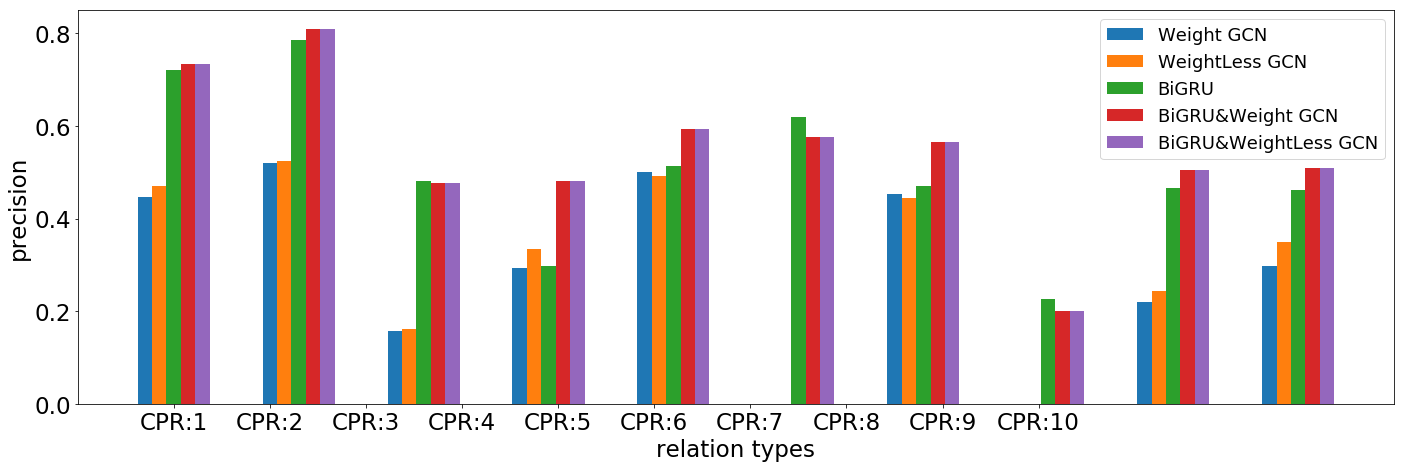

In [12]:
#
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize=23)
matplotlib.rc('ytick',labelsize=23)

font ={#'family':'normal',
       #'weight':'bold',
       'size':'23'
}

matplotlib.rc('font',**font)
labels = [ 'CPR:1', 'CPR:2', 'CPR:3', 'CPR:4', 'CPR:5', 'CPR:6', 'CPR:7', 'CPR:8', 'CPR:9','CPR:10']
i = 0
index_GRU_GCN_NOWEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU = result_report_GRU_HEAD.iloc[range(len(labels)),i]
index_GCN_NOWEIGHT = result_report_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU_GCN_WEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GCN_WEIGHT = result_report_GCN_WEIGHT_HEAD.iloc[range(len(labels)),i]

x = np.arange(len(labels))  # the label locations
width = 0.15 # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))

#a = rects1.get_label()
rects1 = ax.bar(1.3*x -2*width, index_GCN_WEIGHT, width, label='Weight GCN')
rects2 = ax.bar(1.3*x -1*width, index_GCN_NOWEIGHT, width, label='WeightLess GCN')
rects3 = ax.bar(1.3*x , index_GRU, width, label='BiGRU')
rects4 = ax.bar(1.3*x +width, index_GRU_GCN_WEIGHT, width, label='BiGRU&Weight GCN')
rects5 = ax.bar(1.3*x +2*width, index_GRU_GCN_NOWEIGHT, width, label='BiGRU&WeightLess GCN')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 18},loc =1)

#fig.suptitle('test title')
plt.xlabel('relation types')
plt.ylabel('precision')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

'''
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
'''
fig.tight_layout()

plt.show()




###  The performance of five models on each relation type of TFH-2020 in term of Recall.

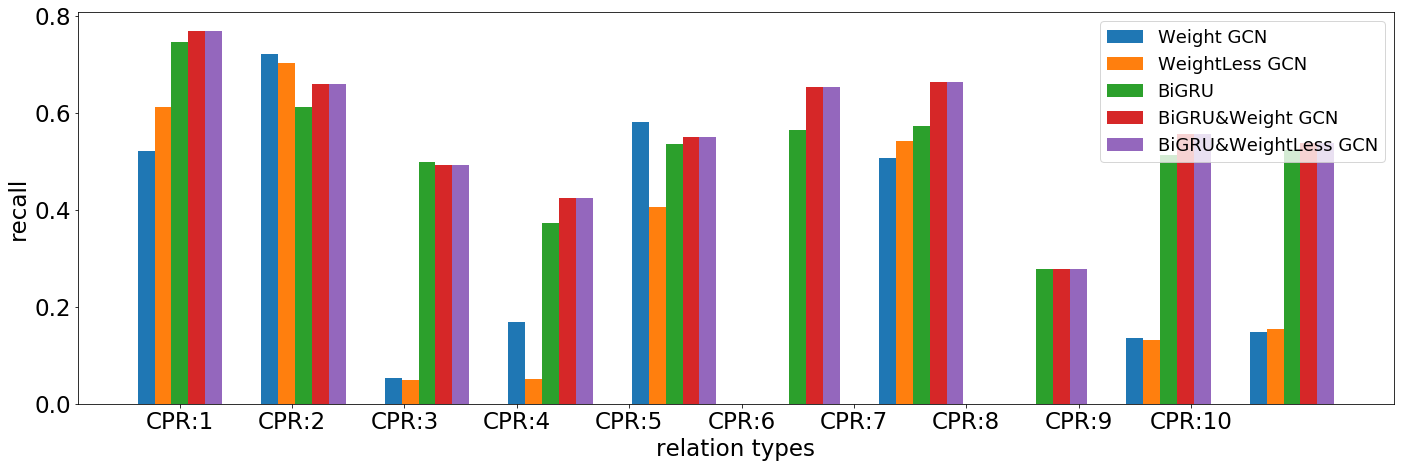

In [13]:
#创建pre对比图
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize=23)
matplotlib.rc('ytick',labelsize=23)

font ={#'family':'normal',
       #'weight':'bold',
       'size':'23'
}

matplotlib.rc('font',**font)
labels = [ 'CPR:1', 'CPR:2', 'CPR:3', 'CPR:4', 'CPR:5', 'CPR:6', 'CPR:7', 'CPR:8', 'CPR:9', 'CPR:10']
i = 1
index_GRU_GCN_NOWEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU = result_report_GRU_HEAD.iloc[range(len(labels)),i]
index_GCN_NOWEIGHT = result_report_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU_GCN_WEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GCN_WEIGHT = result_report_GCN_WEIGHT_HEAD.iloc[range(len(labels)),i]

x = np.arange(len(labels))  # the label locations
width = 0.15 # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))

a = rects1.get_label()
rects1 = ax.bar(1.1*x -2*width, index_GCN_WEIGHT, width, label='Weight GCN')
rects2 = ax.bar(1.1*x -1*width, index_GCN_NOWEIGHT, width, label='WeightLess GCN')
rects3 = ax.bar(1.1*x , index_GRU, width, label='BiGRU')
rects4 = ax.bar(1.1*x +width, index_GRU_GCN_WEIGHT, width, label='BiGRU&Weight GCN')
rects5 = ax.bar(1.1*x +2*width, index_GRU_GCN_NOWEIGHT, width, label='BiGRU&WeightLess GCN')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 18},loc =1)
plt.xlabel('relation types')
plt.ylabel('recall')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

'''
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
'''
fig.tight_layout()

plt.show()





###  The performance of five models on each relation type of TFH-2020 in term of F1-value.

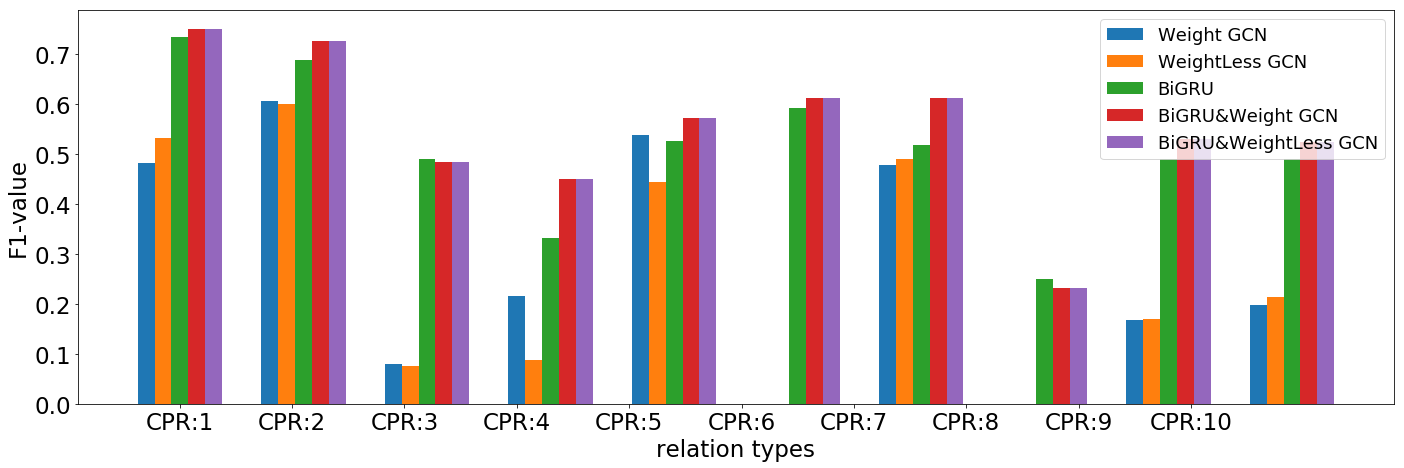

In [14]:
#创建pre对比图
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rc('xtick',labelsize=23)
matplotlib.rc('ytick',labelsize=23)

font ={#'family':'normal',
       #'weight':'bold',
       'size':'23'
}

matplotlib.rc('font',**font)
labels = [ 'CPR:1', 'CPR:2', 'CPR:3', 'CPR:4', 'CPR:5', 'CPR:6', 'CPR:7', 'CPR:8', 'CPR:9', 'CPR:10']
i = 2
index_GRU_GCN_NOWEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU = result_report_GRU_HEAD.iloc[range(len(labels)),i]
index_GCN_NOWEIGHT = result_report_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GRU_GCN_WEIGHT = result_report_GRU_GCN_NOWEIGHT_HEAD.iloc[range(len(labels)),i]
index_GCN_WEIGHT = result_report_GCN_WEIGHT_HEAD.iloc[range(len(labels)),i]

x = np.arange(len(labels))  # the label locations
width = 0.15 # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))

a = rects1.get_label()
rects1 = ax.bar(1.1*x -2*width, index_GCN_WEIGHT, width, label='Weight GCN')
rects2 = ax.bar(1.1*x -1*width, index_GCN_NOWEIGHT, width, label='WeightLess GCN')
rects3 = ax.bar(1.1*x , index_GRU, width, label='BiGRU')
rects4 = ax.bar(1.1*x +width, index_GRU_GCN_WEIGHT, width, label='BiGRU&Weight GCN')
rects5 = ax.bar(1.1*x +2*width, index_GRU_GCN_NOWEIGHT, width, label='BiGRU&WeightLess GCN')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 18},loc =1)
plt.xlabel('relation types')
plt.ylabel('F1-value')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

'''
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
'''
fig.tight_layout()

plt.show()





In [19]:
import numpy as np
from sklearn.metrics import classification_report

test_y = np.load('./TFH_2020/ground_truth.npy')
true_label = np.argmax(test_y, axis=1)

allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN-WLGCN_HEAD.npy')
predict_label = np.argmax(allprob, axis=1)

print 'The performance of BiGRU-HAN-WLGCN_HEAD'+'\n'
print classification_report(true_label,predict_label,digits=5)

print 'macro-average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='macro')
print '\n'
print 'weighted average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='weighted')

The performance of BiGRU-HAN-WLGCN_HEAD

             precision    recall  f1-score   support

          0    0.73294   0.76827   0.75019       643
          1    0.80987   0.65802   0.72609       848
          2    0.47619   0.49261   0.48426       203
          3    0.48077   0.42373   0.45045        59
          4    0.59375   0.55072   0.57143        69
          5    0.57692   0.65217   0.61224        23
          6    0.56589   0.66364   0.61088       330
          7    0.20000   0.27778   0.23256        18
          8    0.50476   0.55497   0.52868       191
          9    0.50955   0.53691   0.52288       149
         10    0.00000   0.00000   0.00000         3
         11    0.48507   0.67708   0.56522        96
         12    0.38889   0.46667   0.42424        30
         13    0.00000   0.00000   0.00000         3
         14    0.50000   0.20000   0.28571         5

avg / total    0.65945   0.64419   0.64778      2670

macro-average precision/recall/f1-value:
(0.45497405858

In [20]:
allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN_HEAD.npy')
predict_label = np.argmax(allprob, axis=1)

print 'The performance of BiGRU-HAN_HEAD'+'\n'
print classification_report(true_label,predict_label,digits=5)

print 'macro-average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='macro')
print '\n'
print 'weighted average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='weighted')

The performance of BiGRU-HAN_HEAD

             precision    recall  f1-score   support

          0    0.72180   0.74650   0.73394       643
          1    0.78485   0.61085   0.68700       848
          2    0.48095   0.49754   0.48910       203
          3    0.29730   0.37288   0.33083        59
          4    0.51389   0.53623   0.52482        69
          5    0.61905   0.56522   0.59091        23
          6    0.47132   0.57273   0.51710       330
          7    0.22727   0.27778   0.25000        18
          8    0.46667   0.51309   0.48878       191
          9    0.46154   0.52349   0.49057       149
         10    0.00000   0.00000   0.00000         3
         11    0.48462   0.65625   0.55752        96
         12    0.42424   0.46667   0.44444        30
         13    0.00000   0.00000   0.00000         3
         14    0.50000   0.20000   0.28571         5

avg / total    0.62690   0.60637   0.61161      2670

macro-average precision/recall/f1-value:
(0.4302331028272752,

In [21]:
allprob = np.load('./TFH_2020/version_2/testset_WLGCN_HEAD.npy')
predict_label = np.argmax(allprob, axis=1)

print 'The performance of WLGCN_HEAD'+'\n'
print classification_report(true_label,predict_label,digits=5)

print 'macro-average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='macro')
print '\n'
print 'weighted average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='weighted')

The performance of WLGCN_HEAD

             precision    recall  f1-score   support

          0    0.46953   0.61120   0.53108       643
          1    0.52469   0.70165   0.60040       848
          2    0.16129   0.04926   0.07547       203
          3    0.33333   0.05085   0.08824        59
          4    0.49123   0.40580   0.44444        69
          5    0.00000   0.00000   0.00000        23
          6    0.44527   0.54242   0.48907       330
          7    0.00000   0.00000   0.00000        18
          8    0.24272   0.13089   0.17007       191
          9    0.34848   0.15436   0.21395       149
         10    0.00000   0.00000   0.00000         3
         11    0.00000   0.00000   0.00000        96
         12    0.00000   0.00000   0.00000        30
         13    0.00000   0.00000   0.00000         3
         14    0.00000   0.00000   0.00000         5

avg / total    0.40389   0.47041   0.42231      2670

macro-average precision/recall/f1-value:
(0.20110360408139374, 0.

In [22]:
allprob = np.load('./TFH_2020/version_2/testset_BiGRU-HAN-WGCN_HEAD.npy')
predict_label = np.argmax(allprob, axis=1)

print 'The performance of BiGRU-HAN-WGCN_HEAD'+'\n'
print classification_report(true_label,predict_label,digits=5)

print 'macro-average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='macro')
print '\n'
print 'weighted average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='weighted')

The performance of BiGRU-HAN-WGCN_HEAD

             precision    recall  f1-score   support

          0    0.73645   0.76050   0.74828       643
          1    0.80000   0.66981   0.72914       848
          2    0.45536   0.50246   0.47775       203
          3    0.48148   0.44068   0.46018        59
          4    0.66102   0.56522   0.60938        69
          5    0.58333   0.60870   0.59574        23
          6    0.57300   0.63030   0.60029       330
          7    0.17857   0.27778   0.21739        18
          8    0.51485   0.54450   0.52926       191
          9    0.51266   0.54362   0.52769       149
         10    0.00000   0.00000   0.00000         3
         11    0.48227   0.70833   0.57384        96
         12    0.35135   0.43333   0.38806        30
         13    0.00000   0.00000   0.00000         3
         14    0.50000   0.20000   0.28571         5

avg / total    0.65849   0.64345   0.64765      2670

macro-average precision/recall/f1-value:
(0.455355962749

In [23]:
allprob = np.load('./TFH_2020/version_2/testset_WGCN_HEAD.npy')
predict_label = np.argmax(allprob, axis=1)

print 'The performance of WGCN_HEAD'+'\n'
print classification_report(true_label,predict_label,digits=5)

print 'macro-average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='macro')
print '\n'
print 'weighted average precision/recall/f1-value:\n',precision_recall_fscore_support(true_label,predict_label,average='weighted')

The performance of WGCN_HEAD

             precision    recall  f1-score   support

          0    0.44726   0.52100   0.48132       643
          1    0.52041   0.72170   0.60474       848
          2    0.15714   0.05419   0.08059       203
          3    0.29412   0.16949   0.21505        59
          4    0.50000   0.57971   0.53691        69
          5    0.00000   0.00000   0.00000        23
          6    0.45257   0.50606   0.47783       330
          7    0.00000   0.00000   0.00000        18
          8    0.22034   0.13613   0.16828       191
          9    0.29730   0.14765   0.19731       149
         10    0.00000   0.00000   0.00000         3
         11    0.00000   0.00000   0.00000        96
         12    0.00000   0.00000   0.00000        30
         13    0.00000   0.00000   0.00000         3
         14    0.00000   0.00000   0.00000         5

avg / total    0.39265   0.45805   0.41484      2670

macro-average precision/recall/f1-value:
(0.19260949939445762, 0.1